### Introduction

The objective of this US is to read a files that have data about parks, the first file is "water_consumption_updated.csv", in which has the water consumption of each park, and the second file contrains the area of those same parks.
Using the data from both files it is expected to then predict the monthly water consumption of a new park with 55 hectares.

For the calculus of the water consumption we used:
$$
\text{Water Consumption} = 
\begin{cases} 
\text{Consumption} \times 0.7 & \text{if Consumption} \leq 1000 \\
(1000 \times 0.7) + ((\text{Consumption} - 1000) \times 0.7 \times 0.15) \text{     } & \text{if } 1000 \leq \text{Consumption}
\end{cases}
$$

Pearson correlation coefficient (r):
$$
r = \frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

Then applying the linear regression, where x is the park area and y is the water cost:
$$
y = \text{intercept} + (\text{slope} \times x)
$$

The slope (m):
$$
m = \frac{n \left( \sum x^2 \right) - \left( \sum x \right)^2}{n \left( \sum xy \right) - \left( \sum x \right) \left( \sum y \right)}
$$

The intercept (b):
$$
b = \frac{n \sum y - m \left( \sum x \right)}{n}
$$

The R²:
$$
R^2 = \left( \frac{[n \left( \sum x^2 \right) - \left( \sum x \right)^2] [n \left( \sum y^2 \right) - \left( \sum y \right)^2]}{n \left( \sum xy \right) - \left( \sum x \right) \left( \sum y \right)} \right)^2
$$

The standard error:
$$
\text{standard error} = \sqrt{\frac{\sum \left( y_i - (\text{intercept} + \text{slope} \times x_i) \right)^2}{n-2} \times \frac{1}{\sum (x_i - \bar{x})^2}}
$$

Now to predict the new area consumption where x is the new park area:
$$
\text{predicted cost} = \text{intercept} + (\text{slope} \times x_{\text{new}})
$$

Confidence interval for prediction
The standard error of the prediction:
$$
\text{SE}_{\text{prediction}} = \text{standard error} \times \sqrt{1 + \frac{1}{n} + \frac{\sum (x_i - \bar{x})^2}{(x_{\text{new}} - \bar{x})^2}}
$$

The confidence interval with 95% is calculated:
$$
\text{CI}_{\text{lower}} = \text{predicted\_cost} - t_{\text{value}} \times \text{SE}_{\text{prediction}}
$$

$$
\text{CI}_{\text{upper}} = \text{predicted\_cost} + t_{\text{value}} \times \text{SE}_{\text{prediction}}
$$

The prediction interval with 95% is calculated:
$$
\text{PI}_{\text{upper}} = \overline{\text{esp}} + t \times \text{SE}_{\text{prediction\_new}}
$$

$$
\text{PI}_{\text{lower}} = \overline{\text{esp}} - t \times \text{SE}_{\text{prediction\_new}}
$$

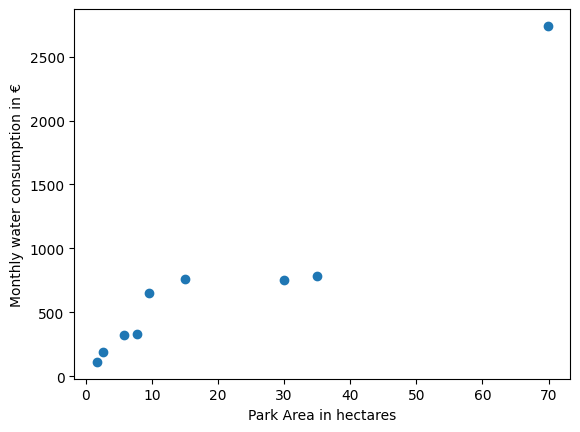

Pearson correlation coefficient (r) = 0.946
Since r > 0, it shows that there is a direct relation between both variables, if one gets bigger the other one should aswell.

Regression line gotten from python: y = 33.861x + 71.816


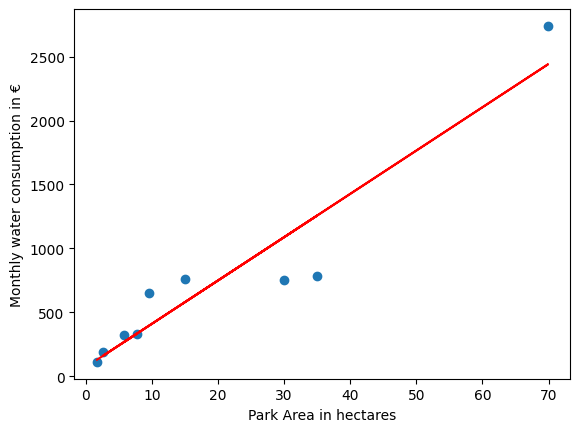

Slope: 33.861
Intercept: 71.816
R²: 0.896
Standard error: 4.369
The expected monthly cost of water consumption for parks with 55 hectares with 95% confidence interval : [1510.27 , 2358.06] €
The expected monthly cost of water consumption for the new park with 55 hectares with 95% prevision interval : [1159.59 , 2708.74] €
Expected average monthly cost of water consumption for a new park with 55 hectares: 1934.17 €


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def read_csv_file(csv):
    return pd.read_csv(csv, sep=";", decimal=",")

def calculate_consumption_cost(consumption):
    cost_per_m3 = 0.7
    threshold = 1000
    fee = 0.15
    
    if (consumption <= threshold):
        cost = consumption * cost_per_m3
    else:
        cost = threshold * cost_per_m3 + ((consumption - threshold) * cost_per_m3 * (1 + fee))
    return cost    

def main():
    df_cons = read_csv_file('water_consumption_updated.csv')
    df_area = read_csv_file('Area.csv')
    
    park_names = df_cons['Park'].unique()
    
    filtered_data = df_cons[df_cons['Park'].isin(park_names)]

    grouped_data = filtered_data.groupby(['Year','Month', 'Park'])
    monthly_consumption_by_park = grouped_data['Consumption'].sum()
    
    monthly_park_cost = monthly_consumption_by_park.apply(calculate_consumption_cost)

    monthly_park_cost_reset = monthly_park_cost.reset_index() 

    total_cost_by_year_month_and_park = monthly_park_cost_reset.groupby(['Year', 'Month', 'Park'])['Consumption'].sum()
    
    total_cost_by_year_month_and_park_reset = total_cost_by_year_month_and_park.reset_index()

    avg_of_monthly_costs_by_park = total_cost_by_year_month_and_park_reset.groupby('Park')['Consumption'].mean()
    
    df_cost = pd.DataFrame(avg_of_monthly_costs_by_park).reset_index()

    merged_df = pd.merge(df_area, df_cost, on='Park')
    
    x = merged_df['Area'].tolist()
    y = merged_df['Consumption'].tolist()

    plt.plot(x, y, 'o')
    plt.xlabel('Park Area in hectares')
    plt.ylabel('Monthly water consumption in €')

    plt.show()
    r = stats.pearsonr(x,y)
    print(f"Pearson correlation coefficient (r) = {r[0]:.3f}")
    print(f"Since r > 0, it shows that there is a direct relation between both variables, if one gets bigger the other one should aswell.")
    
    reta = stats.linregress(x,y)
    df = pd.DataFrame({'x':x,'y':y})
    
    print()
    print(f"Regression line gotten from python: y = {reta.slope:.3f}x + {reta.intercept:.3f}")
    plt.plot(df.x, df.y, 'o', label = 'park data')
    plt.xlabel('Park Area in hectares')
    plt.ylabel('Monthly water consumption in €')
    plt.plot(df.x, reta.intercept + reta.slope*df.x, 'r', label = 'regression line')

    plt.show()

    # Print slope, intercept, R², and standard error
    print(f"Slope: {reta.slope:.3f}")
    print(f"Intercept: {reta.intercept:.3f}")
    print(f"R²: {reta.rvalue**2:.3f}")
    print(f"Standard error: {reta.stderr:.3f}")
    
    n = len(x)
    x_p = 55
    y_esp = reta.intercept + reta.slope * x_p
    Sxx = 0
    Syy = 0
    Sxy = 0

    media_x = np.mean(x)
    media_y = np.mean(y)

    for value_x in x:
        Sxx += (value_x - media_x)**2

    for value_y in y:
        Syy += (value_y - media_y)**2
    
    for index in range(len(x)):
        Sxy += (x[index] - media_x)*(y[index] - media_y)
    
    t = stats.t.ppf(0.975, n-2)
    
    sqe = Syy - Sxy**2 / Sxx
    
    s2 = sqe / (n-2)

    lim_sup = y_esp + t*np.sqrt(s2*(1/n + (x_p - media_x)**2 / Sxx))
    lim_inf = y_esp - t*np.sqrt(s2*(1/n + (x_p - media_x)**2 / Sxx))
    
    lim_sup_ind = y_esp + t*np.sqrt(s2*(1 + (1/n) + (x_p - media_x)**2 / Sxx))
    lim_inf_ind = y_esp - t*np.sqrt(s2*(1 + (1/n) + (x_p - media_x)**2 / Sxx))

    print(f"The expected monthly cost of water consumption for parks with 55 hectares with 95% confidence interval : [{lim_inf:.2f} , {lim_sup:.2f}] €")
    print(f"The expected monthly cost of water consumption for the new park with 55 hectares with 95% prevision interval : [{lim_inf_ind:.2f} , {lim_sup_ind:.2f}] €")
    print(f"Expected average monthly cost of water consumption for a new park with 55 hectares: {y_esp:.2f} €")

main()

### Conclusion
In sumary from the results we get we can conclude that:

1) The pearson correlation coefficient varies from [-1,1].
    
    If r = 0 -> It does not have any linear correlation.
    
    If r = -1 -> It has perfect negative linear correlation.
    
    If r = 1 -> It has perfect positive linear correlation


2) The slope indicates that for each additional hectare of park area, the monthly water cost increases by that amount.

3) The intercept indicates that even with 0 hectares of area it still has a baseline of that amount.

4) The R-squared indicates that amount multiplied by 100 results on the variability in the monthly water cost can be explained by the park area.
    
    If R-squared = 1, then it means that we have a perfect ajustment.
    
    If R-squared = 0, then it means that the regression model does not have any purpose.


5) The standard error indicates that the average distance that the observed values fall from the regression line.

6) The predicted monthly cost for 55 hectare park indicates the predicted amount of the cost of the park calculated by using linear regression.

7) The confidence interval indicates a range within which the true cost is likely to fall 95% of the time.

### Introduction

The objective of this US is to determine the best line that fits the data by using polynomial regression.

The prediction function in linear regression for polynomial features is expressed as a weighted sum of the polynomial terms.
For a polynomial of degree d, the prediction function is:
$$
y = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d
$$

The mean squared error is a measure of how well the model's predictions match the actual data:
$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

To determine the best-fitting polynomial degree, we try different degrees (for example, from 1 to 5) and compute the MSE for each degree:
$$
\text{MSE}(d) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i(d))^2
$$

Degree: 1, MSE: 3.3751
Degree: 2, MSE: 0.0228
Degree: 3, MSE: 0.0227
Degree: 4, MSE: 0.0202
Degree: 5, MSE: 0.0197
The best-fitting polynomial degree is 5 with MSE 0.0197


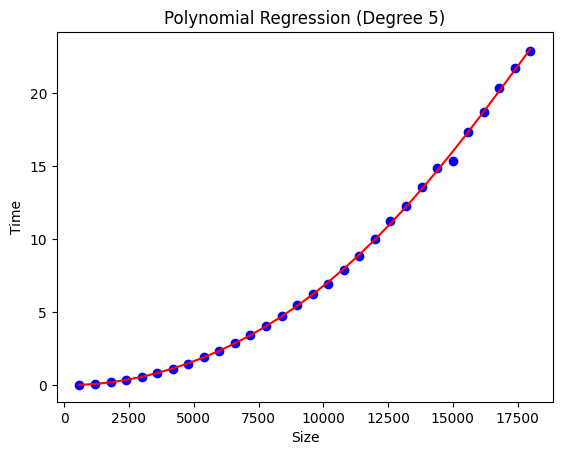

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('solution_us14.csv', sep=";")
data['size'] = data['size'].astype(str).str.replace(',', '.').astype(float)
data['time'] = data['time'].astype(str).str.replace(',', '.').astype(float)

X = data['size'].values
y = data['time'].values

degrees = [1, 2, 3, 4, 5]
bestDegree = 0
bestMse = float('inf')
bestCoefficients = None

def create_polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], degree + 1))
    for i in range(1, degree + 1):
        X_poly[:, i] = X**i
    return X_poly

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

for degree in degrees:
    X_poly = create_polynomial_features(X, degree)
    
    coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
    y_pred = X_poly @ coefficients
    
    mse = mean_squared_error(y, y_pred)
    
    print(f'Degree: {degree}, MSE: {mse:.4f}')
    
    if mse < bestMse:
        bestMse = mse
        bestDegree = degree
        bestCoefficients = coefficients

X_poly = create_polynomial_features(X, bestDegree)
y_pred = X_poly @ bestCoefficients

print(f'The best-fitting polynomial degree is {bestDegree} with MSE {bestMse:.4f}')
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title(f'Polynomial Regression (Degree {bestDegree})')
plt.show()

### Conclusion

To finish what we can conclude from the results is:
1) The lower the MSE (Mean Squared Error) the better fitting polynomial degree.
2) The higher the polynomial degree the more accurate is the prediction.